<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/clusters_Immunotypes_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Manuscript

/content/gdrive/My Drive/Manuscript


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read the initial datasets
data = pd.read_excel("input/cluster/KMeansCluster.xlsx")

In [ ]:
data.head()

,CD8+IFNg+Perf+,NaiveTreg,CD4+IFNg+Perf+,CD8+CD27-,CD4+CD27-,TregFoxP3,CD8+Perf,CD4CD57,CD4EM,CD4+CD28-,...,TregKI67,CD4Naive,CD4KLRG1,Vd2CD57+,Vd1Cx3Cr1,CD8Naive,Vd1CD57,CD4+Tbet,CD8KLRG1,clusterNo
0,16.4546,3.6679,0.8944,62.6608,15.1400,26.4410,36.0613,3.13,36.5299,12.2717,...,12.0113,14.6985,17.4,1.34,56.40,2.2601,37.90,7.8686,82.7,0
1,16.0660,3.8538,9.9939,56.1843,55.8917,12.2036,37.3181,43.20,76.4580,41.9699,...,12.2530,1.1078,60.6,0.00,6.77,0.0745,23.50,25.1588,98.0,0
2,1.4707,13.1900,0.7059,47.6523,27.0053,7.4744,16.2107,10.20,52.4476,11.8119,...,6.7904,8.6559,36.7,6.06,27.60,1.8299,51.90,13.1928,85.2,0
3,16.6525,20.0170,3.9767,64.3609,47.7263,9.6692,41.1590,27.60,62.8501,31.3762,...,8.2273,11.5325,46.1,0.00,1.84,3.1747,1.55,24.2349,88.0,0
4,19.8236,5.6881,0.2670,49.1383,7.6061,12.5971,25.0875,1.13,26.6381,2.0085,...,9.4340,18.7146,24.8,0.00,0.30,1.8831,24.30,9.5249,84.2,0


In [ ]:
# Separate the data for HC and IBM
cluster1 = data[data['clusterNo'] == 0].drop(['clusterNo'], axis=1)
cluster2 = data[data['clusterNo'] == 1].drop(['clusterNo'], axis=1)
cluster3 = data[data['clusterNo'] == 2].drop(['clusterNo'], axis=1)



In [ ]:
cluster1.head()


,CD8+IFNg+Perf+,NaiveTreg,CD4+IFNg+Perf+,CD8+CD27-,CD4+CD27-,TregFoxP3,CD8+Perf,CD4CD57,CD4EM,CD4+CD28-,...,CD8CD57,TregKI67,CD4Naive,CD4KLRG1,Vd2CD57+,Vd1Cx3Cr1,CD8Naive,Vd1CD57,CD4+Tbet,CD8KLRG1
0,16.4546,3.6679,0.8944,62.6608,15.1400,26.4410,36.0613,3.13,36.5299,12.2717,...,25.2,12.0113,14.6985,17.4,1.34,56.40,2.2601,37.90,7.8686,82.7
1,16.0660,3.8538,9.9939,56.1843,55.8917,12.2036,37.3181,43.20,76.4580,41.9699,...,50.2,12.2530,1.1078,60.6,0.00,6.77,0.0745,23.50,25.1588,98.0
2,1.4707,13.1900,0.7059,47.6523,27.0053,7.4744,16.2107,10.20,52.4476,11.8119,...,21.6,6.7904,8.6559,36.7,6.06,27.60,1.8299,51.90,13.1928,85.2
3,16.6525,20.0170,3.9767,64.3609,47.7263,9.6692,41.1590,27.60,62.8501,31.3762,...,46.2,8.2273,11.5325,46.1,0.00,1.84,3.1747,1.55,24.2349,88.0
4,19.8236,5.6881,0.2670,49.1383,7.6061,12.5971,25.0875,1.13,26.6381,2.0085,...,17.1,9.4340,18.7146,24.8,0.00,0.30,1.8831,24.30,9.5249,84.2


In [ ]:
# Sort the dataframes by column names (sample IDs)
cluster1 = cluster1.sort_index(axis=1)
cluster2 = cluster2.sort_index(axis=1)
cluster3 = cluster3.sort_index(axis=1)

In [ ]:
cluster1.head()

,CD4+CD27-,CD4+CD28-,CD4+IFNg+Perf+,CD4+Perf,CD4+Tbet,CD4CD57,CD4EM,CD4KLRG1,CD4Naive,CD8+CD27-,...,CD8KLRG1,CD8Naive,NaiveTreg,TregFoxP3,TregKI67,Vd1CD27-,Vd1CD57,Vd1Cx3Cr1,Vd2+Vg9+,Vd2CD57+
0,15.1400,12.2717,0.8944,0.8040,7.8686,3.13,36.5299,17.4,14.6985,62.6608,...,82.7,2.2601,3.6679,26.4410,12.0113,0.0,37.90,56.40,36.1,1.34
1,55.8917,41.9699,9.9939,10.1000,25.1588,43.20,76.4580,60.6,1.1078,56.1843,...,98.0,0.0745,3.8538,12.2036,12.2530,17.7,23.50,6.77,97.7,0.00
2,27.0053,11.8119,0.7059,8.0272,13.1928,10.20,52.4476,36.7,8.6559,47.6523,...,85.2,1.8299,13.1900,7.4744,6.7904,31.8,51.90,27.60,100.0,6.06
3,47.7263,31.3762,3.9767,6.1229,24.2349,27.60,62.8501,46.1,11.5325,64.3609,...,88.0,3.1747,20.0170,9.6692,8.2273,8.3,1.55,1.84,88.9,0.00
4,7.6061,2.0085,0.2670,1.5054,9.5249,1.13,26.6381,24.8,18.7146,49.1383,...,84.2,1.8831,5.6881,12.5971,9.4340,50.9,24.30,0.30,49.1,0.00


In [ ]:
# Transpose the dataframes
cluster1_transposed = cluster1.T
cluster2_transposed = cluster2.T
cluster3_transposed = cluster3.T

In [ ]:
print(cluster1_transposed)

                     0        1         2        3        4        5   \
CD4+CD27-       15.1400  55.8917   27.0053  47.7263   7.6061  70.0098   
CD4+CD28-       12.2717  41.9699   11.8119  31.3762   2.0085  58.5509   
CD4+IFNg+Perf+   0.8944   9.9939    0.7059   3.9767   0.2670   7.7789   
CD4+Perf         0.8040  10.1000    8.0272   6.1229   1.5054  11.8022   
CD4+Tbet         7.8686  25.1588   13.1928  24.2349   9.5249  49.7248   
CD4CD57          3.1300  43.2000   10.2000  27.6000   1.1300  25.7000   
CD4EM           36.5299  76.4580   52.4476  62.8501  26.6381  72.4051   
CD4KLRG1        17.4000  60.6000   36.7000  46.1000  24.8000  69.5000   
CD4Naive        14.6985   1.1078    8.6559  11.5325  18.7146   5.7520   
CD8+CD27-       62.6608  56.1843   47.6523  64.3609  49.1383  60.3070   
CD8+CD28-       68.6195  83.9853   45.5589  69.5884  65.2674  83.2828   
CD8+IFNg+Perf+  16.4546  16.0660    1.4707  16.6525  19.8236  27.2985   
CD8+Perf        36.0613  37.3181   16.2107  41.1590

In [ ]:
# Concatenate the transposed clusters
merged_data = pd.concat([cluster1_transposed, cluster2_transposed, cluster3_transposed], axis=1)



In [ ]:

merged_data = merged_data.reindex(sorted(merged_data.columns, key=lambda x: int(str(x).split()[1]) if len(str(x).split()) > 1 else int(x)), axis=1)




In [ ]:
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
CD4+CD27-,15.1400,55.8917,27.0053,47.7263,7.6061,70.0098,39.4843,24.6674,31.1465,22.1541,...,42.3934,15.0394,1.6980,16.1687,9.6675,4.8622,8.6025,10.4903,4.0675,3.1425
CD4+CD28-,12.2717,41.9699,11.8119,31.3762,2.0085,58.5509,39.6168,10.9580,24.4398,13.0791,...,26.5768,12.7611,4.0211,9.4818,1.6646,3.1178,1.0062,16.4075,1.9690,1.9028
CD4+IFNg+Perf+,0.8944,9.9939,0.7059,3.9767,0.2670,7.7789,9.6499,2.2227,4.6286,2.6175,...,2.2343,2.3286,1.7672,0.1338,0.6268,0.2699,0.4490,0.4699,1.0832,0.2542
CD4+Perf,0.8040,10.1000,8.0272,6.1229,1.5054,11.8022,10.9421,5.0154,5.3188,12.1042,...,4.7670,3.6964,2.4712,0.1695,0.9864,0.6398,0.5426,1.6070,1.3635,1.1052
CD4+Tbet,7.8686,25.1588,13.1928,24.2349,9.5249,49.7248,23.5398,11.1515,14.6551,8.4688,...,18.4609,7.7365,2.6875,6.9526,0.4390,1.6306,2.2594,7.0478,3.8189,2.6393


In [ ]:
merged_data.index

Index(['CD4+CD27-', 'CD4+CD28-', 'CD4+IFNg+Perf+', 'CD4+Perf', 'CD4+Tbet',
       'CD4CD57', 'CD4EM', 'CD4KLRG1', 'CD4Naive', 'CD8+CD27-', 'CD8+CD28-',
       'CD8+IFNg+Perf+', 'CD8+Perf', 'CD8CD57', 'CD8KLRG1', 'CD8Naive',
       'NaiveTreg', 'TregFoxP3', 'TregKI67', 'Vd1CD27-', 'Vd1CD57',
       'Vd1Cx3Cr1', 'Vd2+Vg9+', 'Vd2CD57+'],
      dtype='object')

In [ ]:
pathology_colors = {0: 'blue', 1: 'salmon', 3: 'green'}



In [ ]:
# Create a list of row colors based on the sample pathology
row_colors = [pathology_colors.get(label, 'gray') for label in data['clusterNo']]






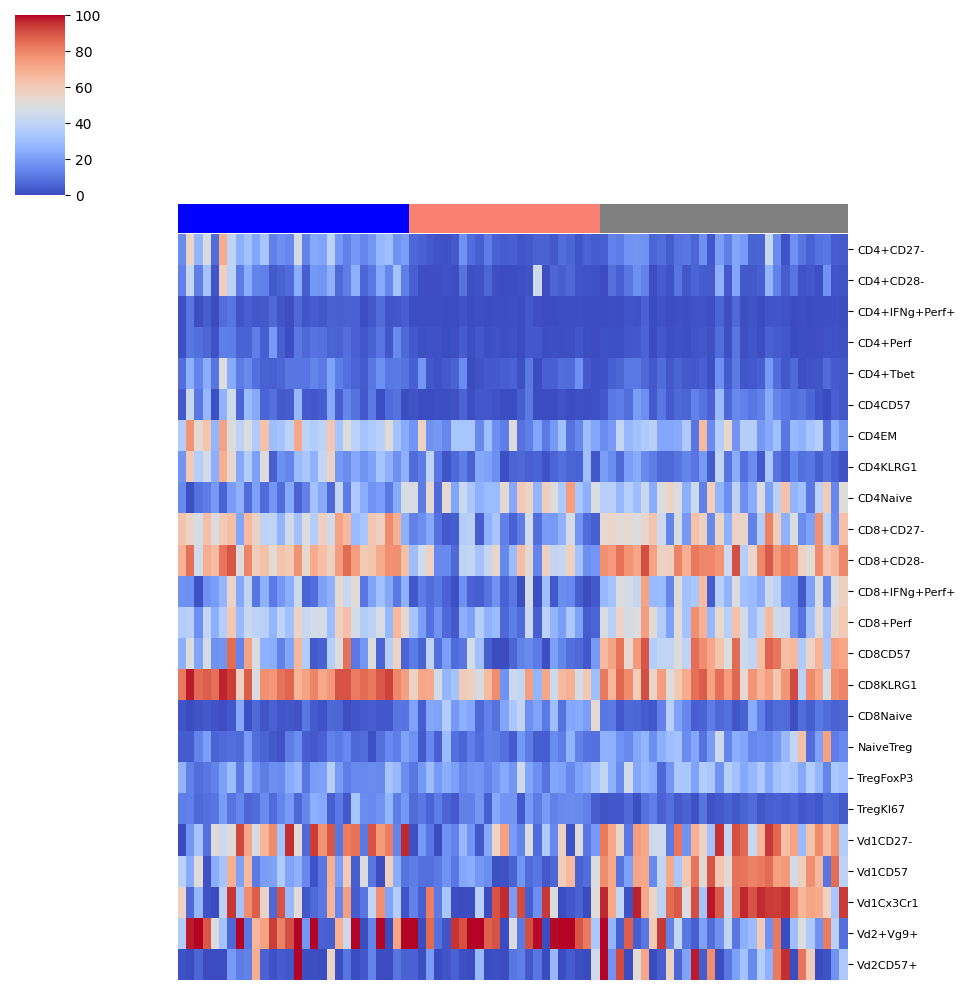

In [ ]:
# Create the clustermap with a color bar on top to separate IBM and HC groups
cluster_map = sns.clustermap(data=merged_data, cmap='coolwarm', row_cluster=False, col_cluster=False,
                             yticklabels=True, xticklabels=False, col_colors=[row_colors])



# Set the font size of the y-axis tick labels
cluster_map.ax_heatmap.tick_params(axis='y', labelsize=8)




In [ ]:
# Draw rectangle boxes around each cluster
rect1 = plt.Rectangle((0,0), len(cluster1_transposed.columns), len(cluster1_transposed.index), fill=False, edgecolor='green', lw=3)
rect2 = plt.Rectangle((len(cluster1_transposed.columns),0), len(cluster2_transposed.columns), len(cluster2_transposed.index), fill=False, edgecolor='red', lw=3)
rect3 = plt.Rectangle((len(cluster1_transposed.columns)+len(cluster2_transposed.columns),0), len(cluster3_transposed.columns), len(cluster3_transposed.index), fill=False, edgecolor='blue', lw=3)
cluster_map.ax_heatmap.add_patch(rect1)
cluster_map.ax_heatmap.add_patch(rect2)
cluster_map.ax_heatmap.add_patch(rect3)

# Set the font size of the y-axis tick labels
cluster_map.ax_heatmap.tick_params(axis='y', labelsize=8)

# Show the plot
plt.show()


